In [28]:
#import statements

#data frames
import pandas as pd
import numpy as np

#graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sklearn cleaning/testing
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score

#sklearn models
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('train.csv',index_col = 0)
test = pd.read_csv('test.csv', index_col = 0)

In [3]:
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [4]:
test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
659,2,12,3000,52
276,21,7,1750,38
263,4,1,250,4
303,11,11,2750,38
83,4,12,3000,34


In [5]:
#shorten column names
column_names = ['mLastDon','nDon','volDon','mFirstDon','target']
train.columns = column_names

#set target to nan
test['target'] = np.nan
test.columns = column_names

In [6]:
train.head()

,mLastDon,nDon,volDon,mFirstDon,target
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [7]:
test.head()

,mLastDon,nDon,volDon,mFirstDon,target
659,2,12,3000,52,NaN
276,21,7,1750,38,NaN
263,4,1,250,4,NaN
303,11,11,2750,38,NaN
83,4,12,3000,34,NaN


In [8]:
trainTest = pd.concat([train, test])

In [9]:
train.head()

,mLastDon,nDon,volDon,mFirstDon,target
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [10]:
#EDA set up
plt.rcParams['figure.figsize']=(15,6)
plt.style.use('seaborn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f888198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111e31358>]], dtype=object)

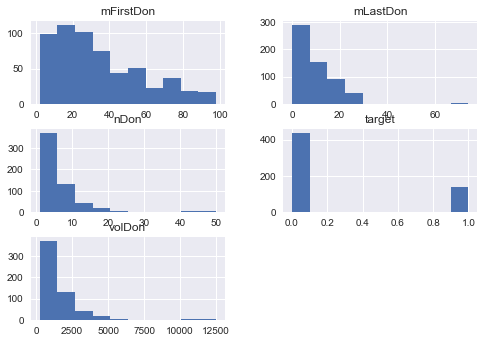

In [11]:
train.hist()

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


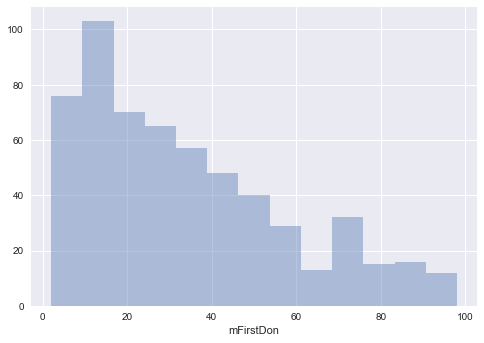

In [12]:
sns.distplot(train.mFirstDon, kde=False, rug=False)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


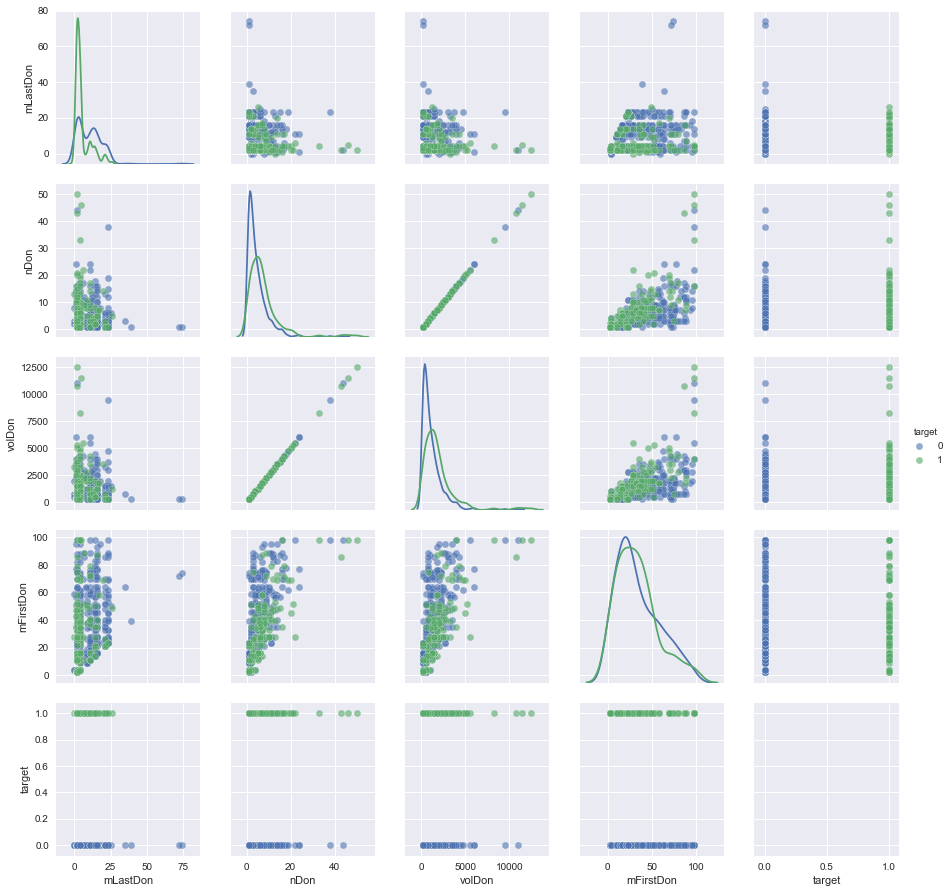

In [13]:
sns.pairplot(train, 
             hue = 'target',
            diag_kind = 'kde',
            plot_kws = {'alpha': 0.6})

In [14]:
train.describe()

,mLastDon,nDon,volDon,mFirstDon,target
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [15]:
#check for missing values
train.isnull().sum()

mLastDon     0
nDon         0
volDon       0
mFirstDon    0
target       0
dtype: int64

In [17]:
#baseline machine learning
clf_rnf = RandomForestClassifier(oob_score=True)
model_rnf = clf_rnf.fit(train.drop(['target'],axis = 1),train.target)

//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [21]:
#predictions

#classification predictions
pred_rnf = model_rnf.predict(test.drop(['target'],axis =1))

#prob predictions
pred_rnf_prob = model_rnf.predict_proba(test.drop(['target'],axis =1))

In [19]:
pred_rnf[0:30]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1])

In [ ]:
pred_rnf_prob

In [26]:
model_rnf.classes_

array([0, 1])

In [29]:
rnf_scores = cross_val_score(clf_rnf, 
                             train.drop(['target'],axis = 1), 
                             train.target, 
                             cv = 10)

//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

In [30]:
rnf_scores.mean()

0.67586206896551726

In [24]:
pred_rnf_prob = pd.DataFrame(pred_rnf_prob)

In [25]:
pred_rnf_prob.head()

,0,1
0,0.150000,0.850000
1,0.900000,0.100000
2,0.919975,0.080025
3,0.800000,0.200000
4,1.000000,0.000000


In [ ]:
#final training
model_rnf = clf_rnf.fit(train.drop(['target'],axis = 1),train.target)

In [32]:
pred_rnf_prob = pred_rnf_prob.drop(0, axis = 1)

In [33]:
pred_rnf_prob.head()

,1
0,0.850000
1,0.100000
2,0.080025
3,0.200000
4,0.000000


In [34]:
pred_rnf_prob.columns = ['Made Donation in March 2007']

In [35]:
pred_rnf_prob.head()

,Made Donation in March 2007
0,0.850000
1,0.100000
2,0.080025
3,0.200000
4,0.000000


In [37]:
test.index

Int64Index([659, 276, 263, 303,  83, 500, 530, 244, 249, 728,
            ...
            321, 523, 426, 196, 301, 103, 224, 454, 585, 154],
           dtype='int64', length=200)

In [39]:
pred_rnf_prob = pred_rnf_prob.set_index(test.index)

In [40]:
pred_rnf_prob.to_csv('rnf_baseline.csv',index = True)